In [101]:
from create_datasets import read_json_dataset

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

DIV_CMAP = sns.diverging_palette(220, 0, as_cmap=True) # DIVERGENT COLOR MAP
sns.set_style("whitegrid")

LERC_PREDS_FILEPATH = "../../outputs/experiment/preds/LERC-dev_preds.json"
DATASET_DIR = "../../data/preprocessing_minmaxscale/all_datasets"
FILENAME = "dev"

TARGET_COL = "score_scaled"
FEATURES = [
    'char_edit_score',
    'word_edit_score',
    'recall', 
    'tp', 
    'fn',
    'precision',
    'fp',
    'f1_score',
    'sari_context',
    'sari_question',
    'bleu1',
    'bleu2',
    'bleu3',
    'bleu4',
    'hf_bleu1', 
    'hf_bleu2',
    'hf_bleu3',
    'hf_bleu4',
    'rougeL',
    'hf_rouge1',
    'hf_rouge2',
    'hf_rougeL',
    'hf_rougeLsum',
    'precision_at_err1',
    'recall_at_err1',
    'meteor',
    'bertscore',
    'bleurt',
    'wmd',
]


def cast_types(df: pd.DataFrame, features: list, label: str) -> pd.DataFrame:
    print("Loaded", len(df), "examples")

    for feat in features + [label]:
        df[feat] = df[feat].astype(float)
        
    return df

## Compute correlations for individual metrics in DEV set

In [102]:
data = read_json_dataset(DATASET_DIR, FILENAME)
df = pd.DataFrame(data).T
df["example_id"] = df.index.map(lambda s: s.split("-")[-1])

print("Read", FILENAME, "dataset with", len(df), "examples from", DATASET_DIR)
print("Data file contains data for:", df.dataset.unique())
df = cast_types(df, FEATURES, TARGET_COL)
df.describe()

Read dev dataset with 3897 examples from ../../data/preprocessing_minmaxscale/all_datasets
Data file contains data for: ['narrativeqa' 'cosmosqa' 'socialiqa' 'mcscript' 'quoref' 'drop']
Loaded 3897 examples


char_edit_score  word_edit_score       recall           tp  \
count      3897.000000      3897.000000  3897.000000  3897.000000   
mean          0.009132         0.014479     0.319986     0.068925   
std           0.018904         0.024818     0.321210     0.081953   
min           0.000000         0.000000     0.000000     0.000000   
25%           0.003531         0.006061     0.000000     0.000000   
50%           0.005085         0.009091     0.250000     0.050000   
75%           0.007415         0.013636     0.500000     0.100000   
max           0.552966         0.718182     1.000000     0.800000   

                fn    precision           fp     f1_score  sari_context  \
count  3897.000000  3897.000000  3897.000000  3897.000000   3897.000000   
mean      0.104173     0.286876     0.026467     0.275864      0.544368   
std       0.087902     0.301934     0.029115     0.273224      0.189400   
min       0.000000     0.000000     0.000000     0.000000      0.089546   
25%       0.037037     0.000000     0.007092     0.000000      0.402116   
50%       0.074074     0.200000     0.014184     0.222222      0.538654   
75%       0.148148     0.500000     0.035461     0.500000      0.676439   
max       1.074074     1.000000     0.560284     1.000000      0.999258   

       sari_question  ...    hf_rouge2    hf_rougeL  hf_rougeLsum  \
count    3897.000000  ...  3897.000000  3897.000000   3897.000000   
mean        0.667594  ...     0.109283     0.283779      0.283779   
std         0.133397  ...     0.211663     0.271152      0.271152   
min         0.080706  ...     0.000000     0.000000      0.000000   
25%         0.565121  ...     0.000000     0.000000      0.000000   
50%         0.653872  ...     0.000000     0.235294      0.235294   
75%         0.757710  ...     0.125000     0.500000      0.500000   
max         1.000000  ...     1.000000     1.000000      1.000000   

       precision_at_err1  recall_at_err1       meteor    bertscore  \
count        3897.000000     3897.000000  3897.000000  3897.000000   
mean            0.165189        0.170026     0.173823     0.598258   
std             0.316512        0.320027     0.207044     0.175298   
min             0.000000        0.000000     0.000000     0.100607   
25%             0.000000        0.000000     0.000000     0.479474   
50%             0.000000        0.000000     0.112175     0.569361   
75%             0.166667        0.200000     0.263046     0.696879   
max             1.000000        1.000000     1.000000     0.999262   

            bleurt          wmd  score_scaled  
count  3897.000000  3897.000000   3897.000000  
mean      0.887685     0.371439      0.335482  
std       0.035441     0.190884      0.372768  
min       0.121900     0.000000      0.000000  
25%       0.874609     0.245762      0.000000  
50%       0.889717     0.368928      0.166667  
75%       0.904235     0.501403      0.666667  
max       0.966443     0.989258      1.000000  

[8 rows x 30 columns]

In [103]:
with open(LERC_PREDS_FILEPATH, "r") as f:
    LERC = json.load(f)

LERC_RESULTS = []
for dataset, d in LERC.items():
    for example_id, scores in d.items():
        LERC_RESULTS.append({
            "dataset": dataset,
            "example_id": example_id,
            "LERC_original": scores["pred_score"],
            "LERC": (scores["pred_score"] - 1) / (5-1)
        })
LERC_RESULTS = pd.DataFrame(LERC_RESULTS).set_index(["dataset", "example_id"])
LERC_RESULTS.describe()

LERC_original         LERC
count    4009.000000  4009.000000
mean        2.500627     0.375157
std         1.504290     0.376073
min         0.676559    -0.080860
25%         1.160446     0.040112
50%         1.845366     0.211342
75%         4.011345     0.752836
max         5.133385     1.033346

In [104]:
df_w_lerc = df.set_index(["dataset", "example_id"]).join(LERC_RESULTS).reset_index()
assert len(df_w_lerc) == len(df)

### Metrics distribution

2231 (out of 3897) where rougeL values differ


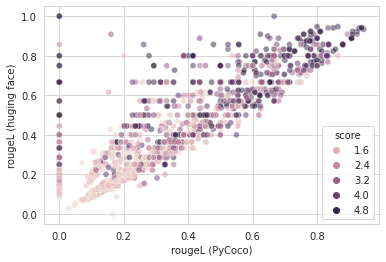

626 (out of 3897) where bleu1 values differ


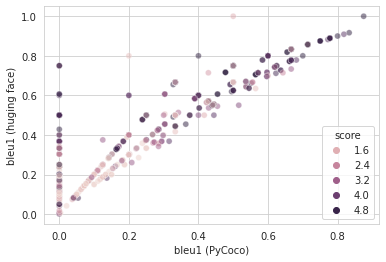

384 (out of 3897) where bleu2 values differ


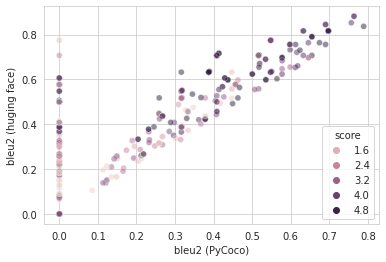

252 (out of 3897) where bleu3 values differ


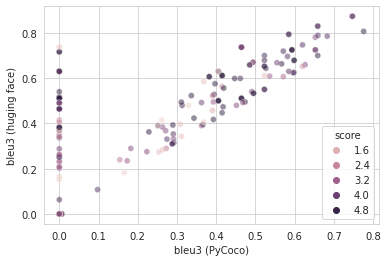

310 (out of 3897) where bleu4 values differ


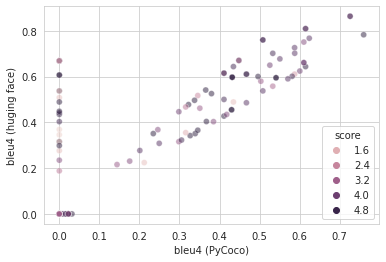

In [105]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

for metric in ("rougeL", "bleu1", "bleu2", "bleu3", "bleu4"):
    diff = df_w_lerc[np.abs(df_w_lerc[metric] - df_w_lerc[f"hf_{metric}"]) > 1e-5]
    print(len(diff), f"(out of {len(df_w_lerc)}) where {metric} values differ")
    sns.scatterplot(data=diff, x=metric, y=f"hf_{metric}", hue="score", alpha=0.5)
    plt.xlabel(f"{metric} (PyCoco)")
    plt.ylabel(f"{metric} (huging face)")
    plt.show()

In [106]:
from scipy.stats import pearsonr
pearsonr(df_w_lerc.wmd, df_w_lerc.score_scaled)

(-0.48300126209806293, 5.510919506744498e-227)

<AxesSubplot:xlabel='wmd', ylabel='Count'>

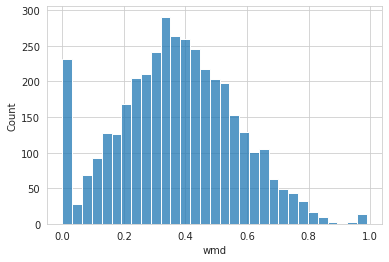

In [107]:
sns.histplot(df_w_lerc["wmd"])

In [108]:
df_w_lerc.sort_values("wmd").tail(20)

dataset                        example_id  \
2029     mcscript  1e908ca8448bb7e20b015531d909243c   
3462         drop  0d6999076fc1f638f471e9e746d534d5   
3169     mcscript  0a4d19c44cd2d8faa5a361782ef470cb   
733      mcscript  b519d91aa5f3111bdd5cebfc6bfaaebd   
1516         drop  606459eb93a640da49cfad22b5b73fb2   
3377       quoref  4c888d8fe7fdac2fae0640e327e89e21   
1317     mcscript  ac4304fa36c286d84de79829bac05114   
3849     mcscript  049bcdcd2cbbeccfd56a8166bb960abd   
525   narrativeqa  5b4e2f7739e7a3aba371737e4bd4b6a5   
582   narrativeqa  7edd6ad00c1ccaa27dc91bb04d660e45   
2924  narrativeqa  b7e0311d1a0c0a5861cb1beb9dccbe24   
52           drop  828ea4bd5ad16717c7dd21598276ad99   
2235         drop  3741f23367c0815ea9fa30c3bf6151e9   
2238         drop  b64a8411bf88317189822d9a02f804cb   
1744     mcscript  36ae23795b6727e522dfc514002fb25c   
2100     mcscript  274ab30425424906fcbef78dd3bd5166   
807      mcscript  0de1eb022f69ca051754fd2569acb18f   
1743     mcscript  84ed7fa8c03a145a417401c277ff0946   
2517     mcscript  ab9fb39ecd00787de9af678a5e81d255   
3805     mcscript  4184aa128ba186511c9ba0d4d00f3a89   

                                      candidate  \
2029                             They were sick   
3462                                          0   
3169                              It was a mess   
733                                     Evening   
1516                                     people   
3377                                          3   
1317                                          1   
3849                                          1   
525                                          1)   
582   During the Civil War and the Restoration.   
2924              he is about about about reign   
52                                    teenagers   
2235                                  teenagers   
2238                                  teenagers   
1744                                        One   
2100                                          1   
807                                    only one   
1743                                          2   
2517                                          1   
3805                                        $ 1   

                                                context  \
2029  The other day was so crazy! I came home and th...   
3462  The defeat at Ngasaunggyan broke the back of B...   
3169  The garbage bag in the kitchen was completely ...   
733   Today morning at 7 o'clock I entered into my o...   
1516  The age distribution, , in Aigle is; 933 child...   
3377  The Symphony No. 3, Op. 36, also known as the ...   
1317  This morning I decided to do my dirty laundry ...   
3849  This week we had bad weather from a tropical s...   
525   The play begins with three pages disputing ove...   
582   The story begins in 1647 when King Charles I h...   
2924  The plot is a loosely based on a melange of mo...   
52    The age distribution, , in Lausanne is; 11,818...   
2235  The age distribution, , in Lausanne is; 11,818...   
2238  The age distribution, , in Lausanne is; 11,818...   
1744  Today I realized that my bathroom was too mess...   
2100  Tim wrote a letter to his cousin last night . ...   
807   Today I realized that my bathroom was too mess...   
1743  There are a lot of vending machines where I li...   
2517  There are a lot of vending machines where I li...   
3805  This afternoon at work, I got hungry for a sna...   

                                               metadata  \
2029            {'scores': [1, 1, 1], 'source': 'gpt2'}   
3462            {'scores': [1, 1], 'source': 'naqanet'}   
3169            {'scores': [1, 1, 1], 'source': 'gpt2'}   
733             {'scores': [1, 1, 1], 'source': 'gpt2'}   
1516            {'scores': [1, 1], 'source': 'naqanet'}   
3377               {'scores': [1, 1], 'source': 'bert'}   
1317            {'scores': [5, 5, 5], 'source': 'gpt2'}   
3849            {'scores': [5, 5, 5], 'source': 'gpt2'}   
525        

### Correlations

In [109]:
def plot_correlations(data, col, corr_method="pearson", figsize=(16, 12), **kwargs):
    plt.figure(figsize=figsize)
    sns.heatmap(data.corr(method=corr_method), vmin=-1, vmax=1, cmap=DIV_CMAP, annot=True, fmt=".2", **kwargs)
    plt.show() 

    for val in data[col].unique():
        plt.figure(figsize=figsize)
        df = data[data[col] == val]
        sns.heatmap(data.corr(method=corr_method), vmin=-1, vmax=1, cmap=DIV_CMAP, annot=True, fmt=".2", **kwargs)
        plt.title(f"{col}={val}")
        plt.show()

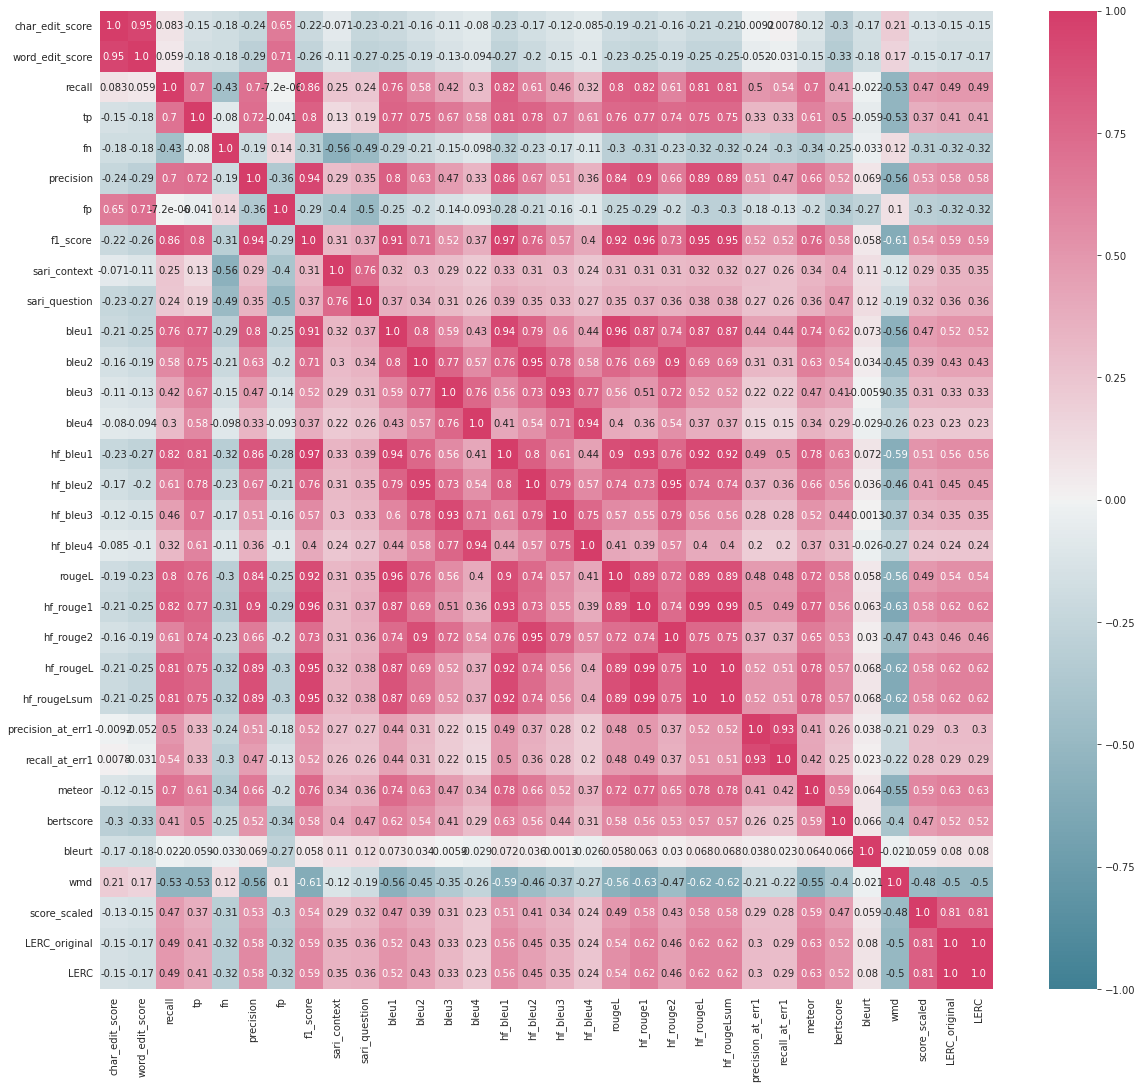

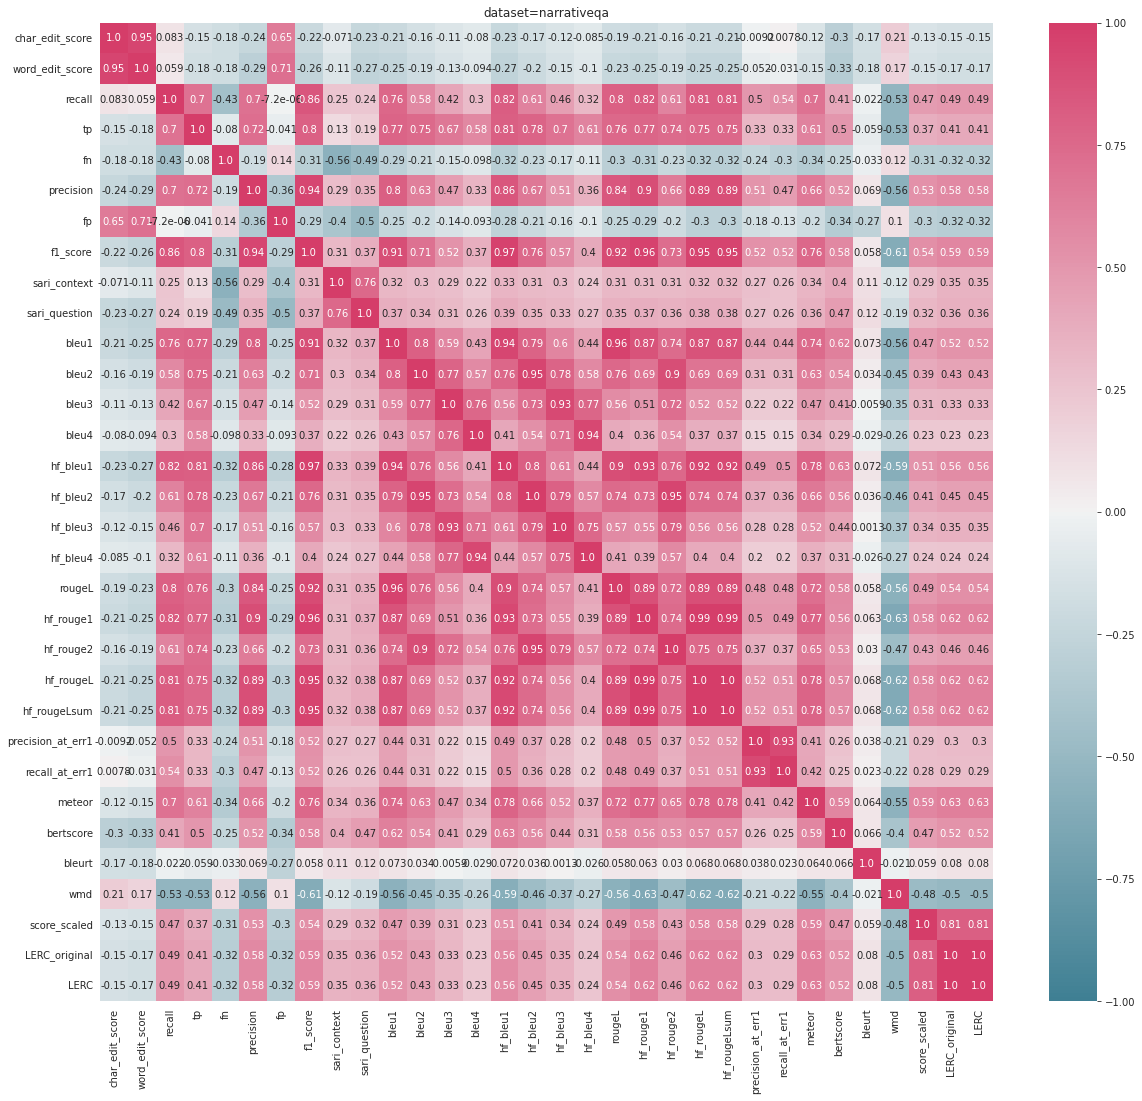

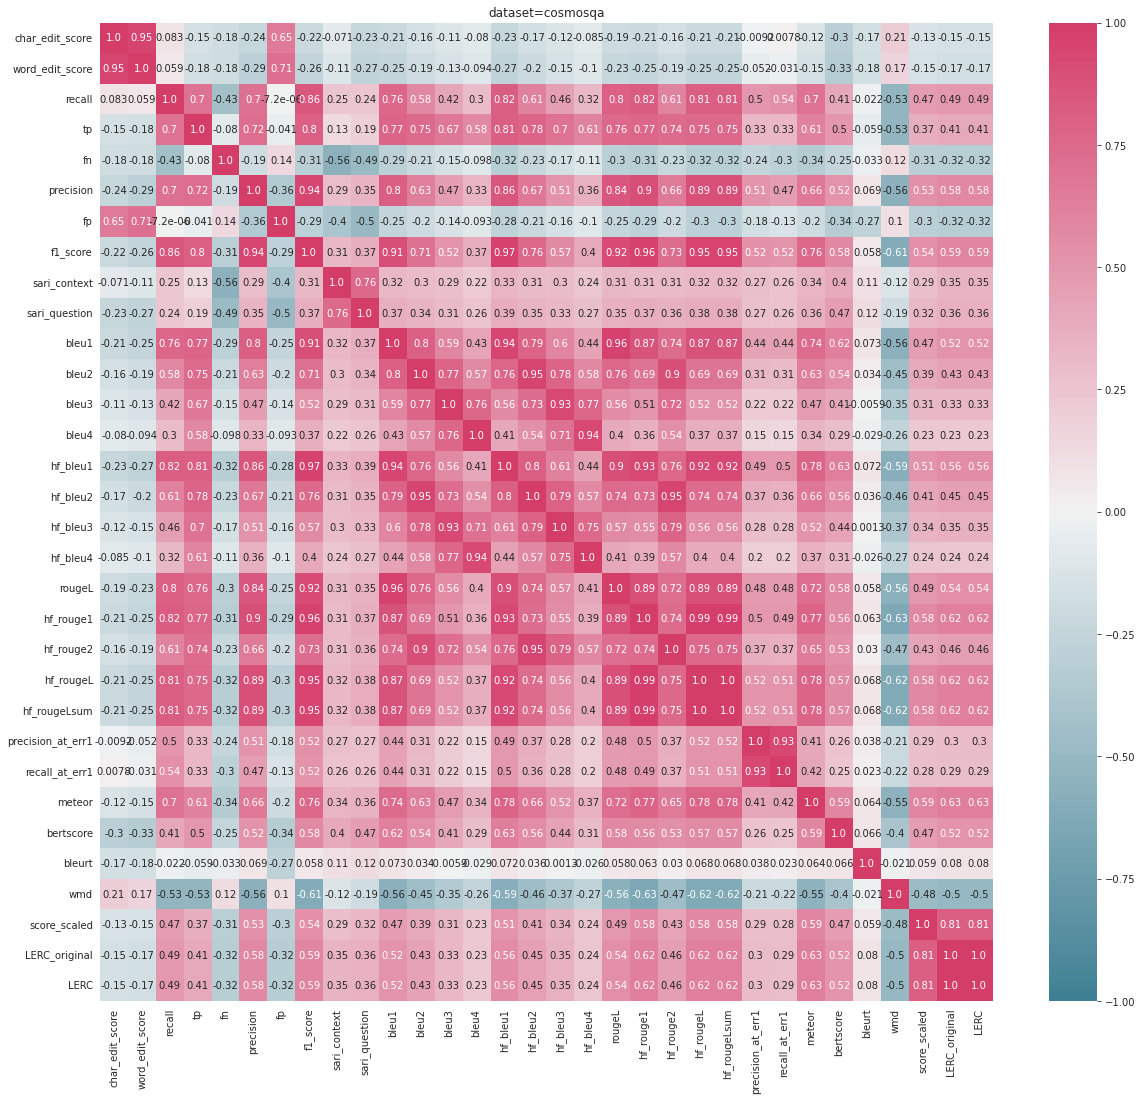

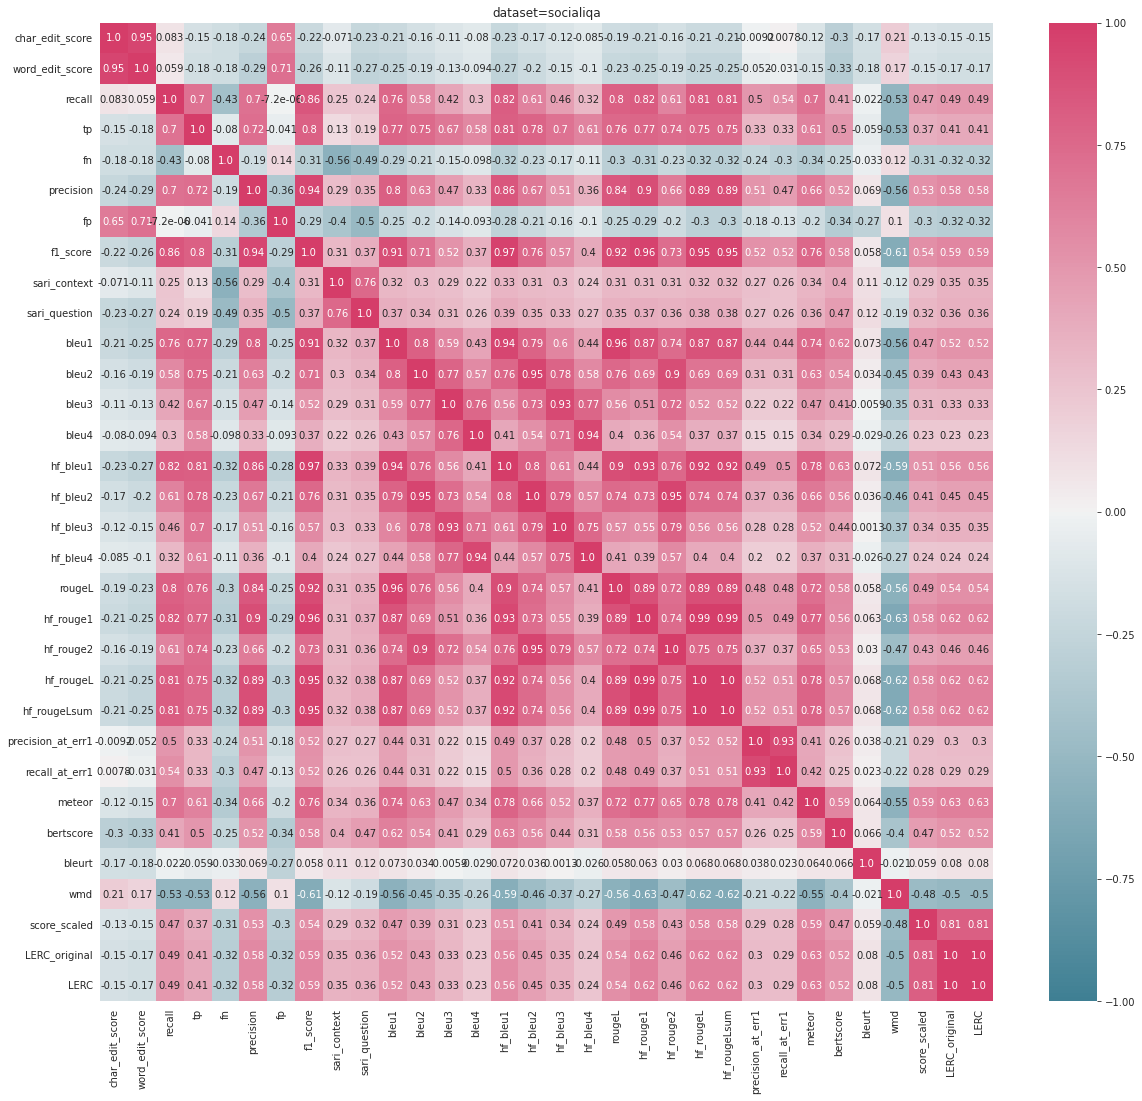

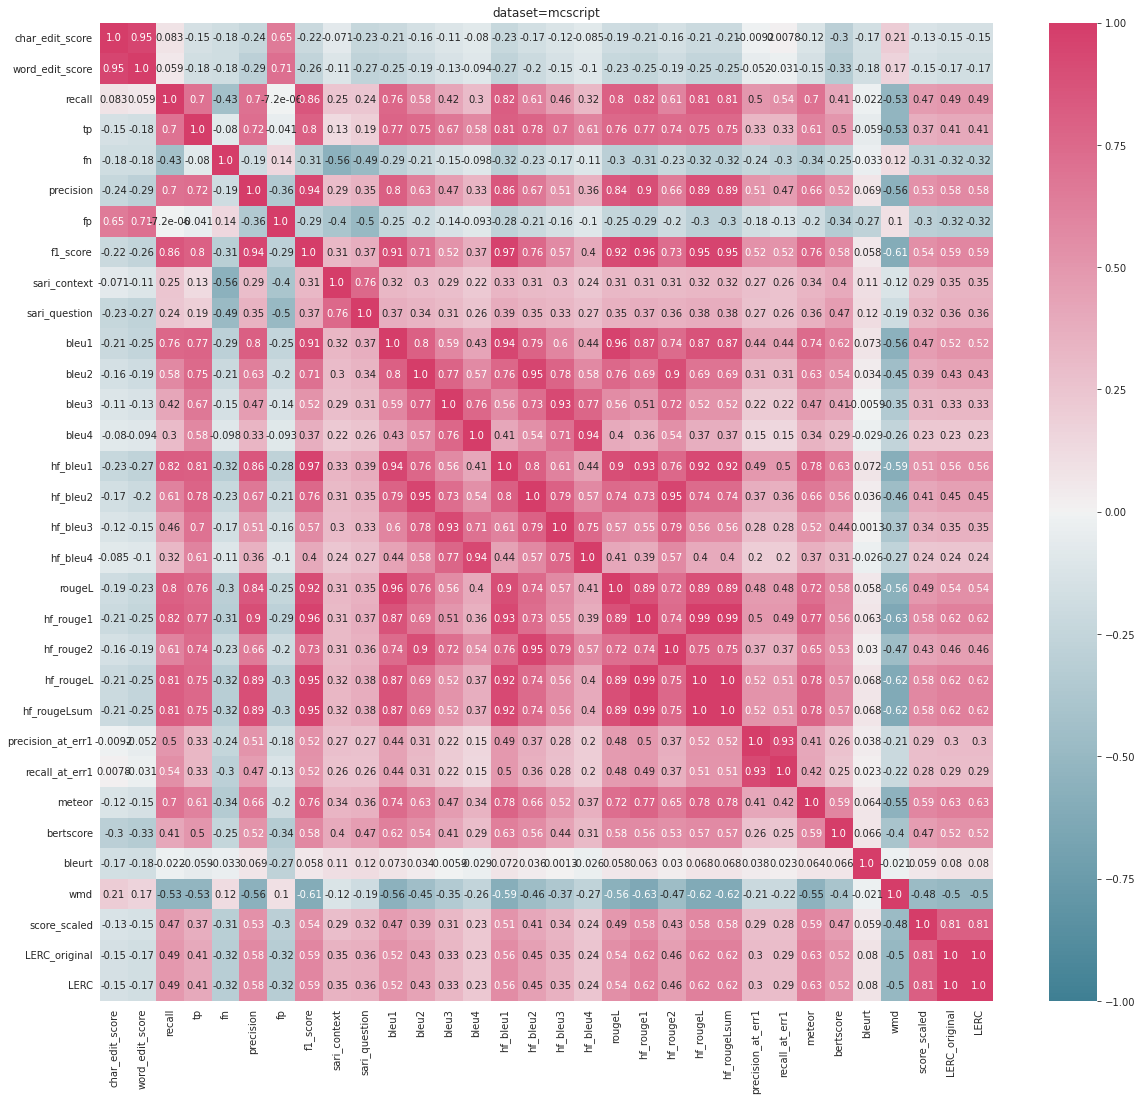

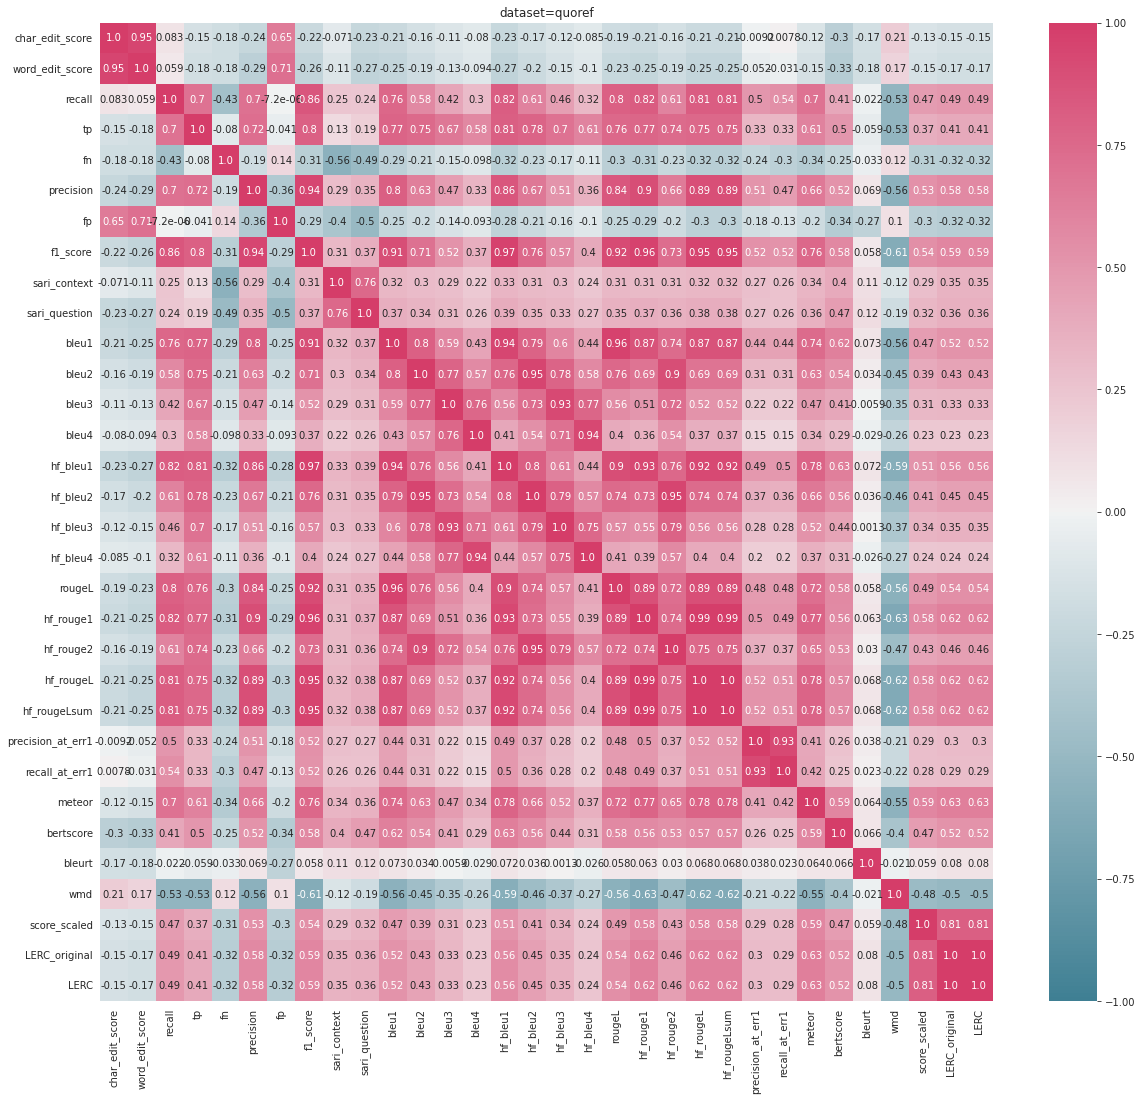

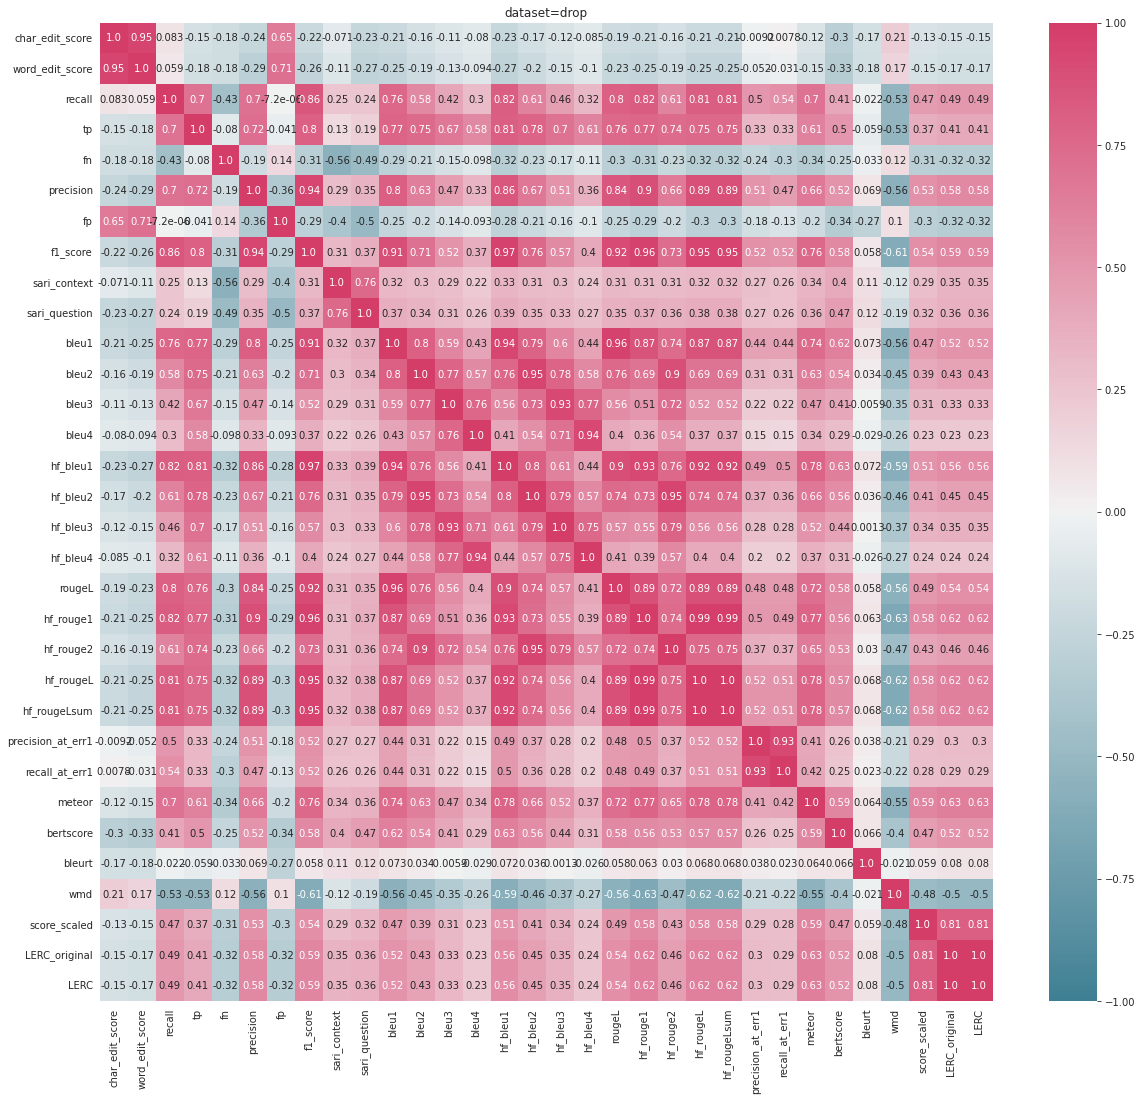

In [110]:
plot_correlations(df_w_lerc, "dataset", figsize=(20, 18))

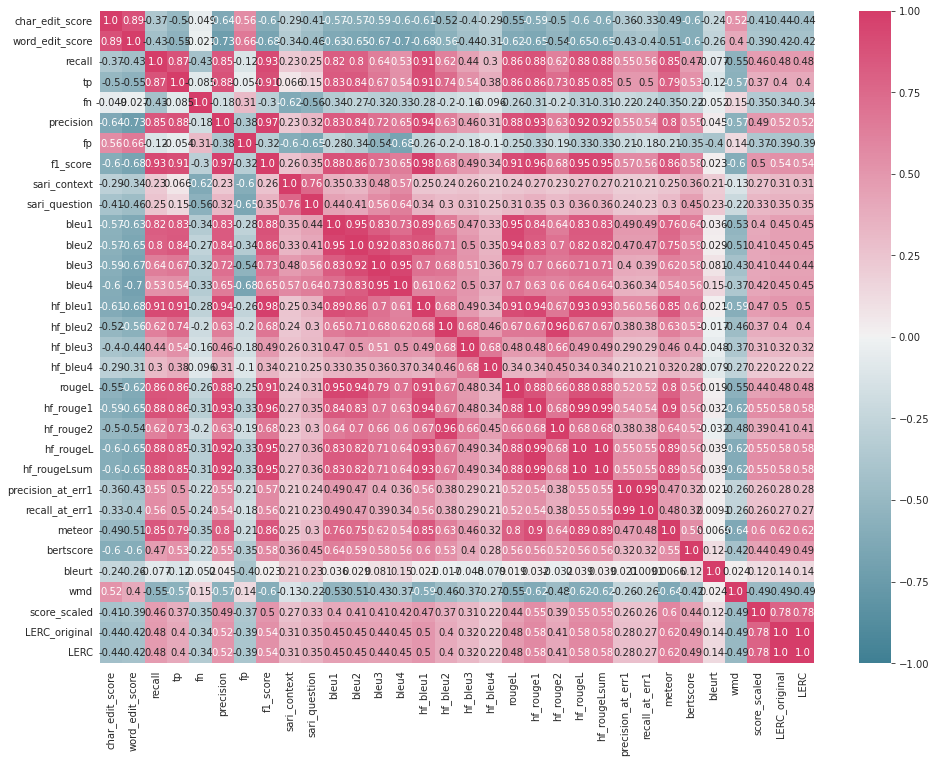

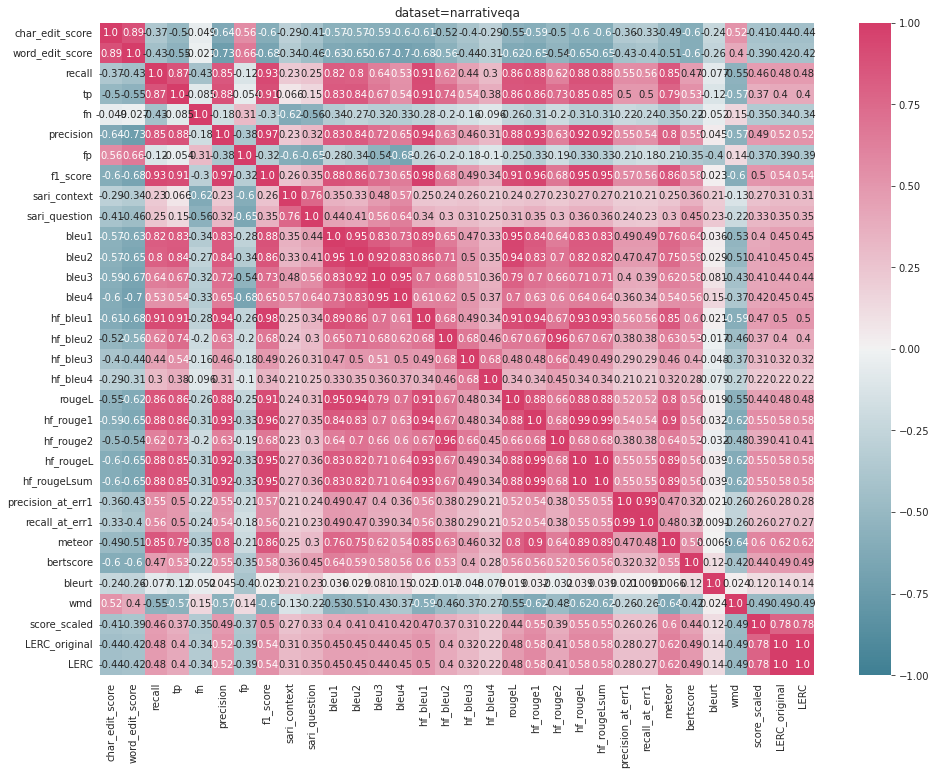

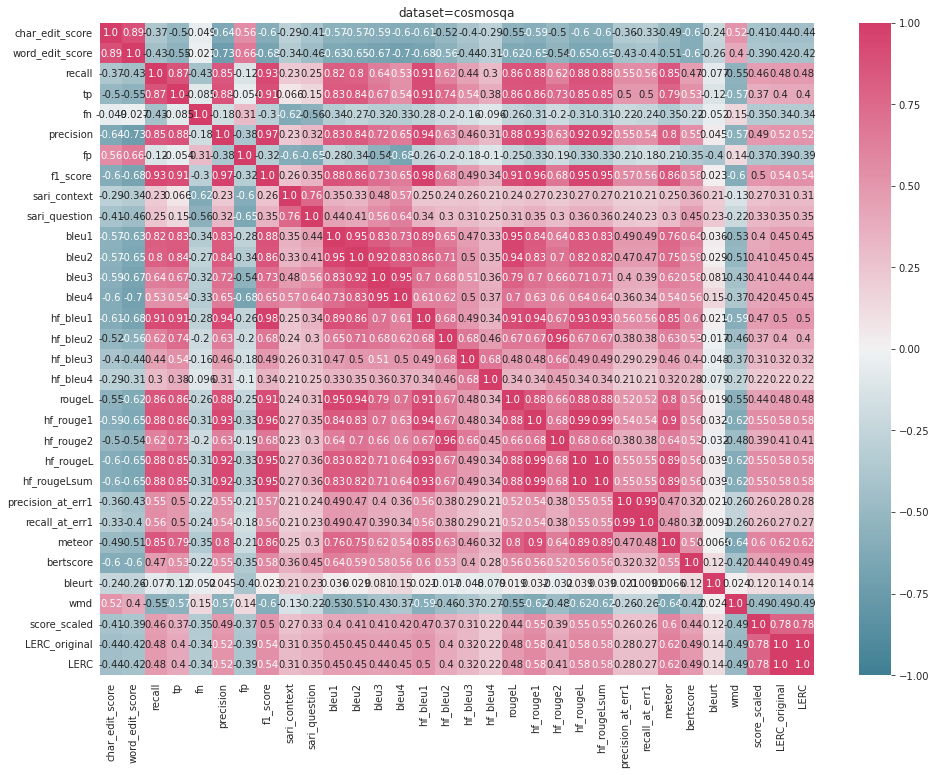

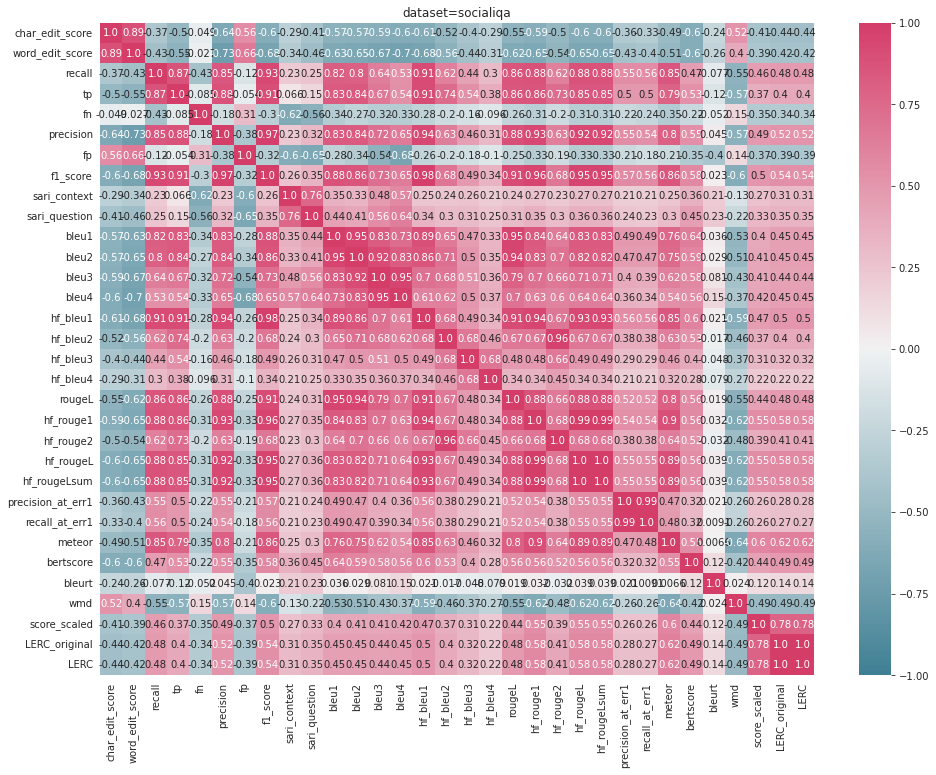

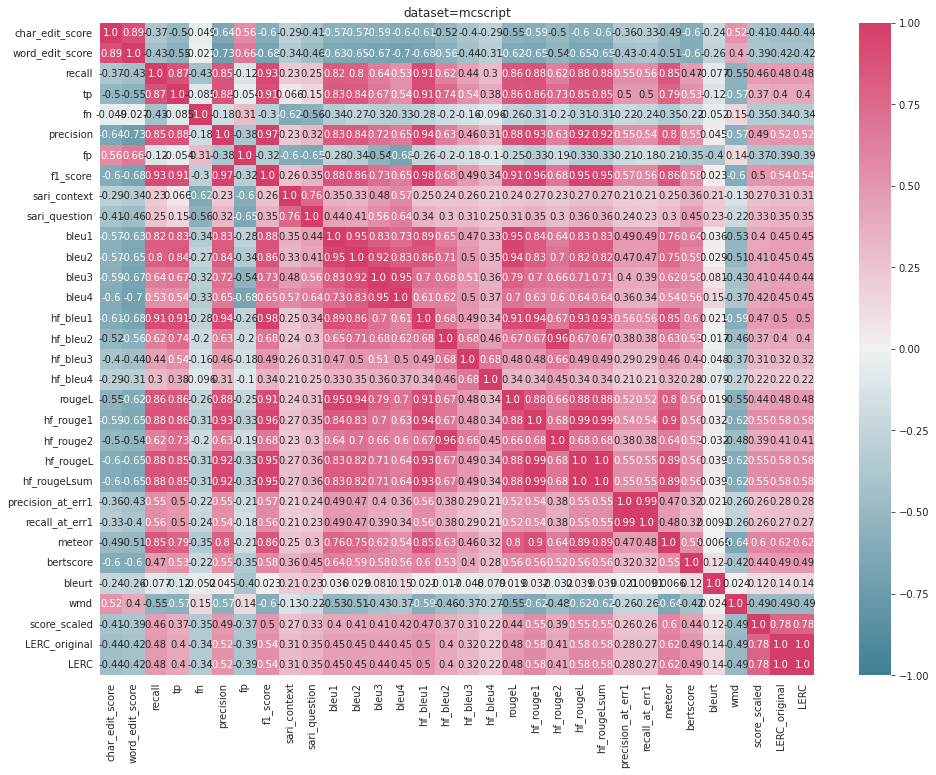

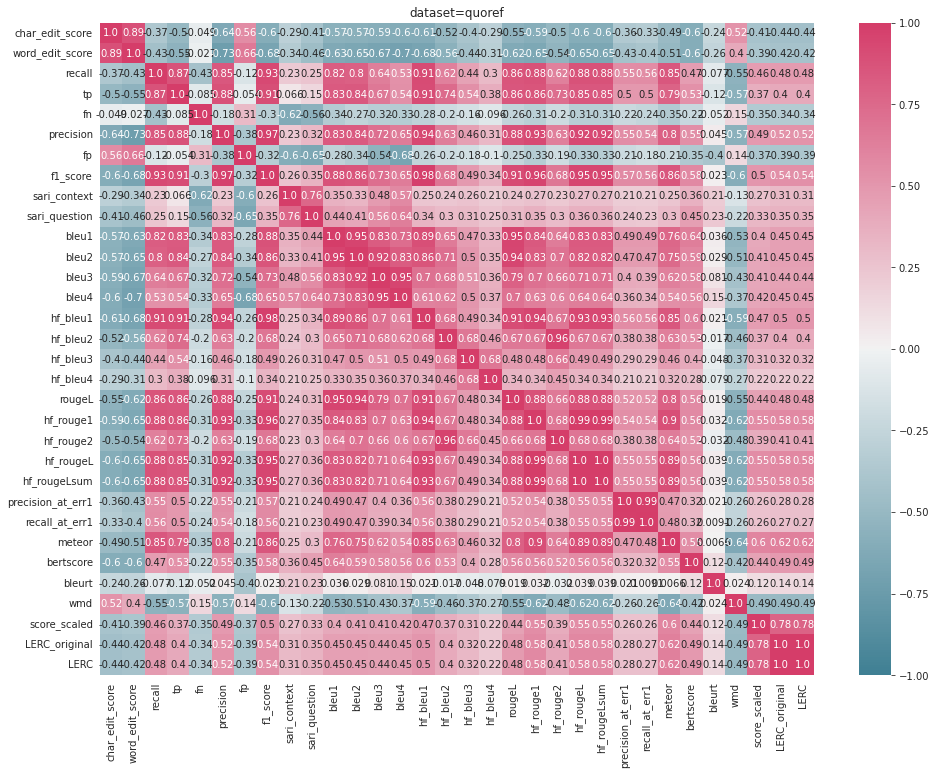

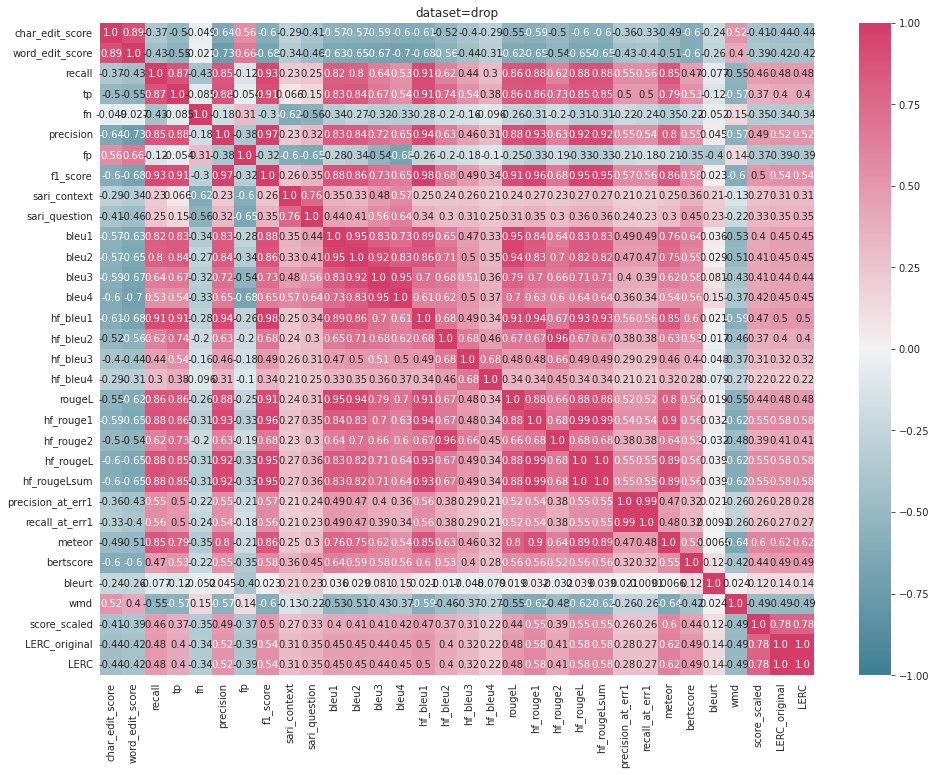

In [111]:
plot_correlations(df_w_lerc, "dataset", corr_method="spearman")

ValueError: Could not interpret value `human_correctness` for parameter `x`

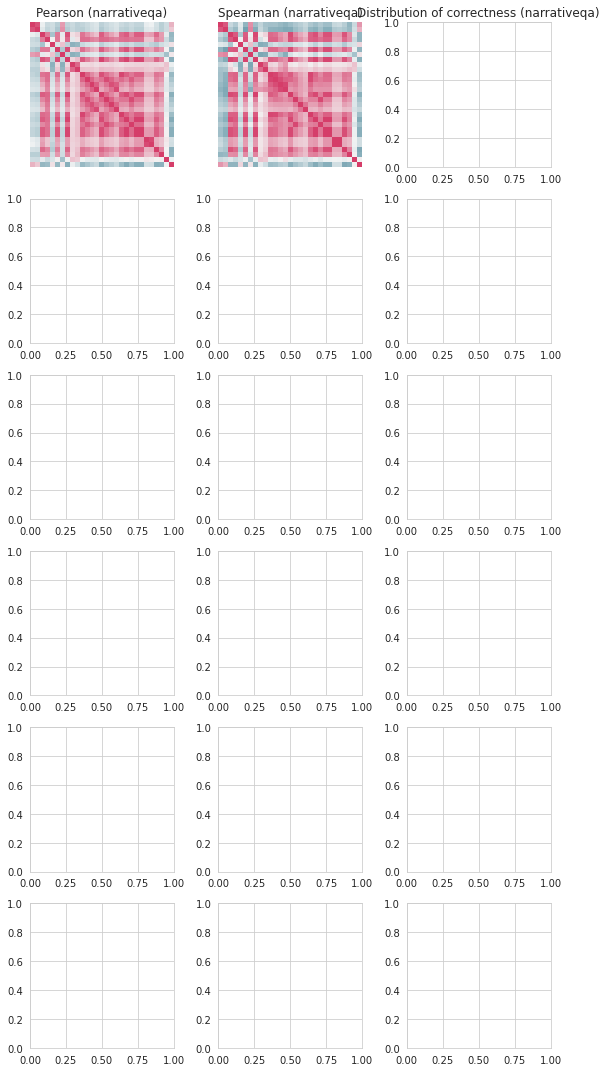

In [114]:
fig, axes = plt.subplots(nrows=df_w_lerc.dataset.nunique(), ncols=3, figsize=(8, 15), tight_layout=True)

for i, dataset in enumerate(df_w_lerc.dataset.unique()):
    ax_pearson, ax_spearman, ax_correctness = axes[i, 0], axes[i, 1], axes[i, 2]
    df = df_w_lerc[df_w_lerc["dataset"] == dataset]
    df_features = df[FEATURES]
    
    sns.heatmap(df_features.corr(method="pearson"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False,  ax=ax_pearson)
    ax_pearson.set_title(f"Pearson ({dataset})")
    
    sns.heatmap(df_features.corr(method="spearman"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False, ax=ax_spearman)
    ax_spearman.set_title(f"Spearman ({dataset})")
    
    ax_correctness.set_title(f"Distribution of correctness ({dataset})")
    sns.histplot(df, x="human_correctness", ax=ax_correctness, bins=10, binrange=(0,1))

In [ ]:
# How do these correlations change when we consider the subset of questions >= 2
fig, axes = plt.subplots(nrows=dev_df.dataset.nunique(), ncols=3, figsize=(8, 15), tight_layout=True)

data = dev_df[(dev_df["human_correctness"] >= 0.25) & (dev_df["human_correctness"] <= 0.75)]
for i, dataset in enumerate(data.dataset.unique()):
    ax_pearson, ax_spearman, ax_correctness = axes[i, 0], axes[i, 1], axes[i, 2]
    df = data[data["dataset"] == dataset]
    df_features = df[features[1:]]
    
    sns.heatmap(df_features.corr(method="pearson"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False,  ax=ax_pearson)
    ax_pearson.set_title(f"Pearson ({dataset})")
    
    sns.heatmap(df_features.corr(method="spearman"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False, ax=ax_spearman)
    ax_spearman.set_title(f"Spearman ({dataset})")
    
    ax_correctness.set_title(f"Distribution of correctness ({dataset})")
    sns.histplot(df, x="human_correctness", ax=ax_correctness, bins=10, binrange=(0,1))

### Determine the metrics distribution

<AxesSubplot:xlabel='LERC', ylabel='score_scaled'>

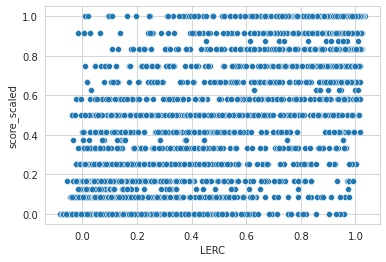

In [116]:
sns.scatterplot(data=df_w_lerc, x="LERC", y=TARGET_COL)

<AxesSubplot:xlabel='recall', ylabel='f1_score'>

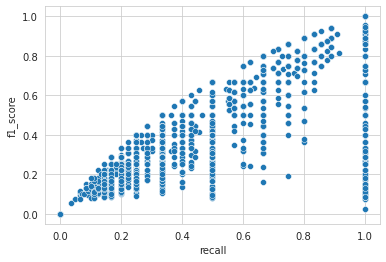

In [119]:
sns.scatterplot(data=df_w_lerc, x="recall", y="f1_score")

<AxesSubplot:xlabel='bertscore', ylabel='score_scaled'>

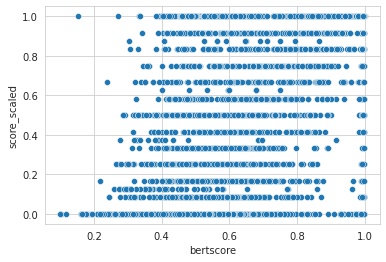

In [121]:
sns.scatterplot(data=df_w_lerc, x="bertscore", y=TARGET_COL)

In [126]:
df_w_lerc[df_w_lerc["bertscore"] <= 0.6]

dataset                        example_id  \
0     narrativeqa  4e85ac9745260de9d54964c8c81c9613   
2       socialiqa  72afd1e547fd735d1d47299828af383c   
3        mcscript  610ca8c4fe039311c497f619eb05a20d   
4       socialiqa  daf6bac7cbd3a41d620d46124aa91cba   
5     narrativeqa  2c4d384fb16b7b3e9b0bd0fe6b5926bb   
...           ...                               ...   
3890     mcscript  128ce775611be9524fa77bd943e237c0   
3891     mcscript  db93a152672216d1f6c50c2ffa741814   
3892  narrativeqa  e7a014c51cbf61d65ab096e7c81091b4   
3893  narrativeqa  923c6d1429f9c275c52b53f7ae57c92a   
3894     mcscript  75baa75e6563dd3bcae2e275d187dc3c   

                                              candidate  \
0                                         they are left   
2                                                 gored   
3     They needed food so they would have a better v...   
4                                     get the task done   
5        The part of his estate where they were buried.   
...                                                 ...   
3890                          Back where they belonged.   
3891                                       The narrator   
3892                                        Frank Straw   
3893         they are too distant to get into the Mass.   
3894                                        an overflow   

                                                context  \
0     The plot centres on the neurotic young priest ...   
2     Robin won the championship and got a big troph...   
3     This week we had bad weather from a tropical s...   
4     Skylar put their mind to the task because it w...   
5     The story begins in 1647 when King Charles I h...   
...                                                 ...   
3890  The kids' bedroom was a mess.  There were toys...   
3891  The fishing day went really well and Allan was...   
3892  The story concerns a love triangle. The protag...   
3893  The plot centres on the neurotic young priest ...   
3894  Today morning at 7 o'clock I entered into my o...   

                                               metadata  \
0               {'scores': [1, 1, 1], 'source': 'mhpg'}   
2     {'scores': [1, 1, 1], 'source': 'backtranslati...   
3               {'scores': [1, 1, 1], 'source': 'gpt2'}   
4               {'scores': [2, 1, 1], 'source': 'gpt2'}   
5               {'scores': [1, 1, 1], 'source': 'gpt2'}   
...                                                 ...   
3890            {'scores': [3, 2, 2], 'source': 'gpt2'}   
3891            {'scores': [1, 1, 5], 'source': 'gpt2'}   
3892  {'scores': [4, 3, 4], 'source': 'backtranslati...   
3893            {'scores': [1, 1, 1], 'source': 'gpt2'}   
3894            {'scores': [1, 1, 1], 'source': 'gpt2'}   

                                               question  \
0                        What happened to Serge Mouret?   
2                      What will Robin want to do next?   
3     Why did they choose to order take out and not ...   
4                     What will Skylar want to do next?   
5                   Where did Jacob hide the 4 orphans?   
...                                                 ...   
3890  Where did they put the toys that they did not ...   
3891                           Who is cooking the fish?   
3892                         Who does Hancock resemble?   
3893      Why do very few people attend Serge's Masses?   
3894       Was there a spill or was it generally dirty?   

                                              reference     score  \
0                  Serge Moute had a nervous breakdown.       1.0   
2                                                 proud       1.0   
3                      they wanted to have a fort party       1.0   
4                                        review details  1.333333   
5                               In his isolated cottage       1.0   
...                                                 ...       ...   
3890                          

<AxesSubplot:xlabel='recall', ylabel='f1_score'>

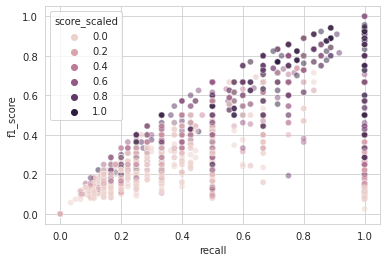

In [123]:
sns.scatterplot(data=df_w_lerc, x="recall", y="f1_score", hue=TARGET_COL, alpha=0.5)

<AxesSubplot:xlabel='recall', ylabel='bleu1'>

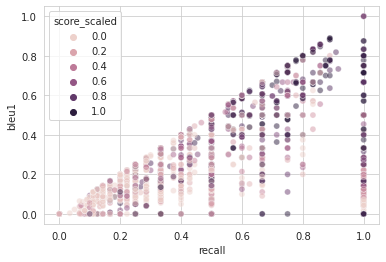

In [124]:
sns.scatterplot(data=df_w_lerc, x="recall", y="bleu1", hue=TARGET_COL, alpha=0.5)

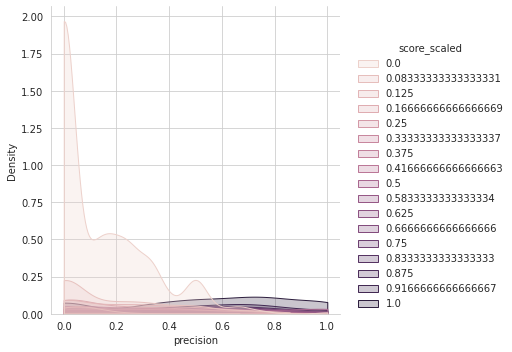

In [122]:
sns.displot(data=df_w_lerc, x="precision", hue=TARGET_COL, kind="kde", fill=True, cut=0)

In [ ]:
sns.pairplot(df_w_lerc[features[1:]])

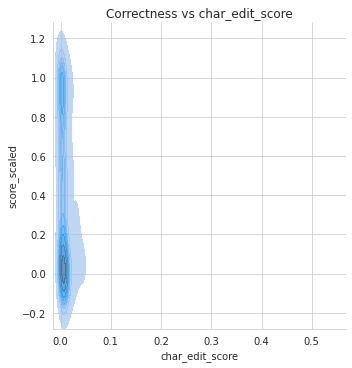

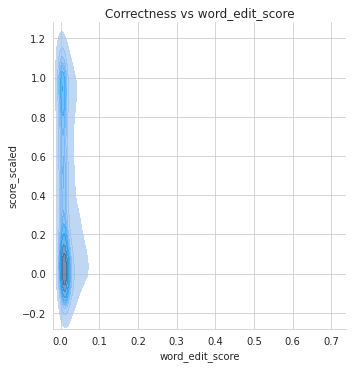

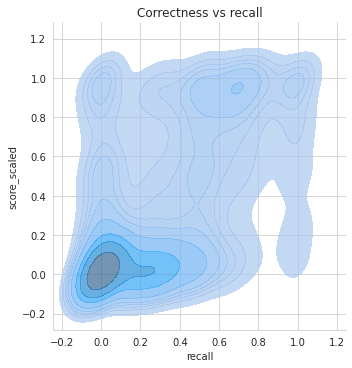

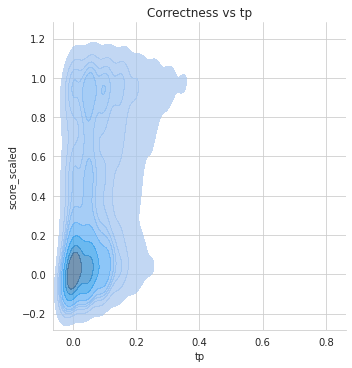

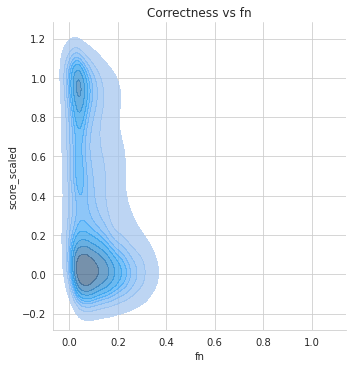

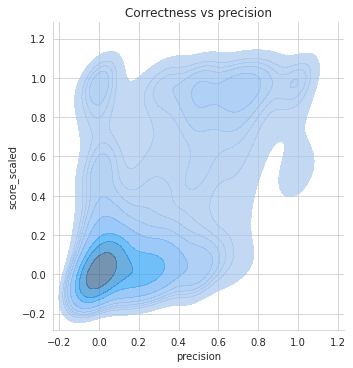

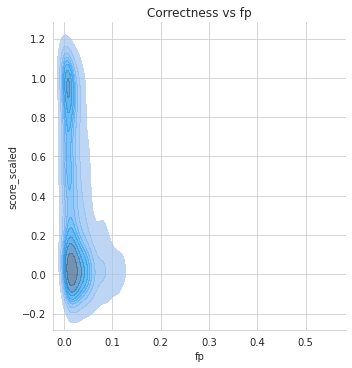

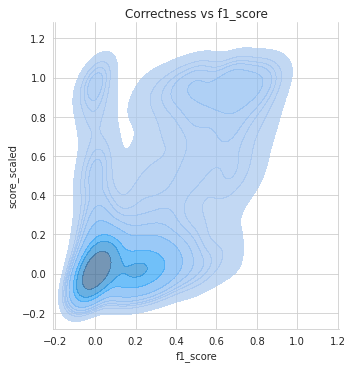

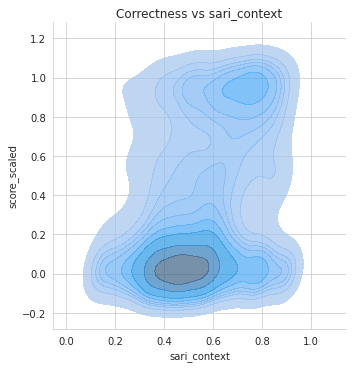

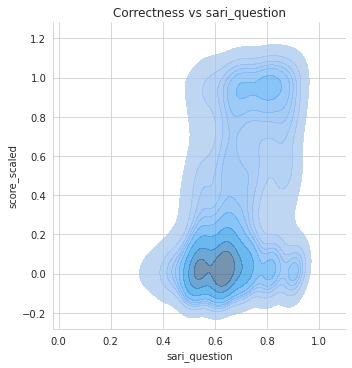

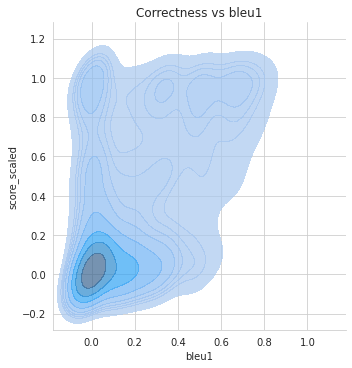

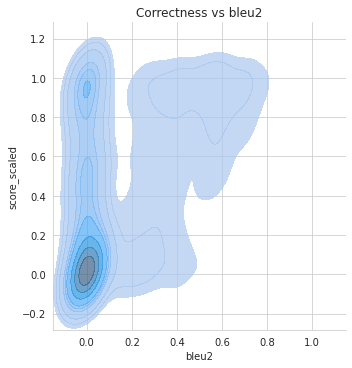

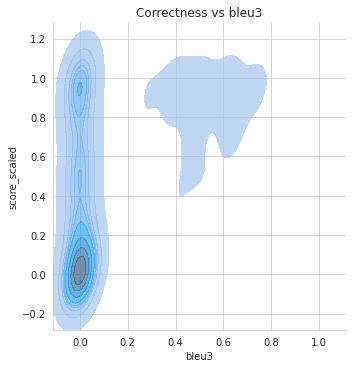

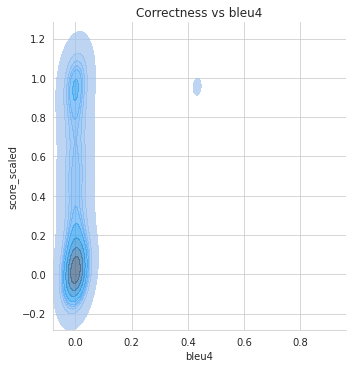

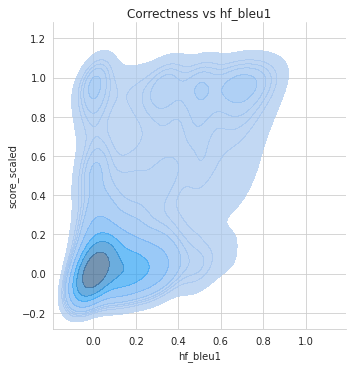

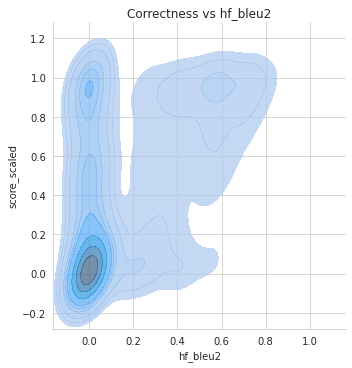

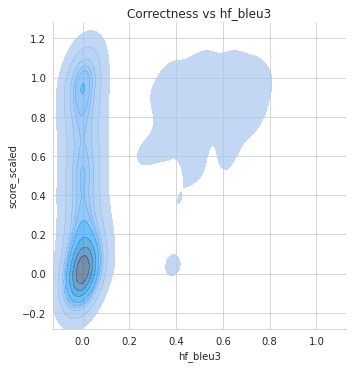

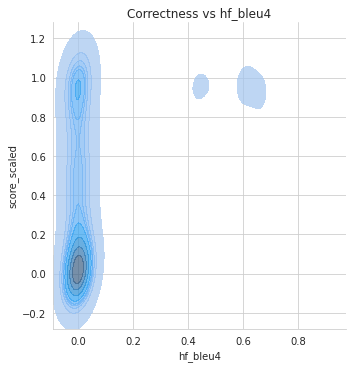

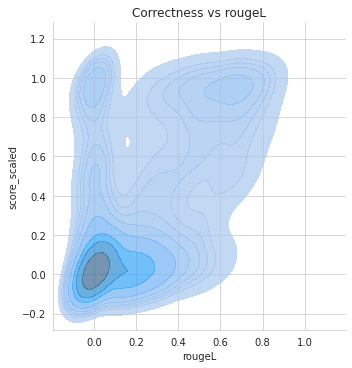

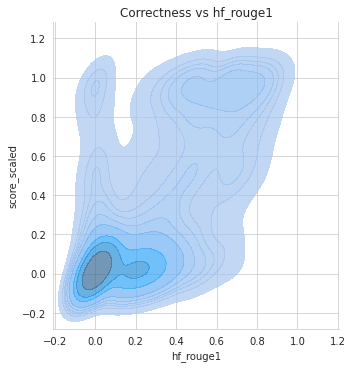

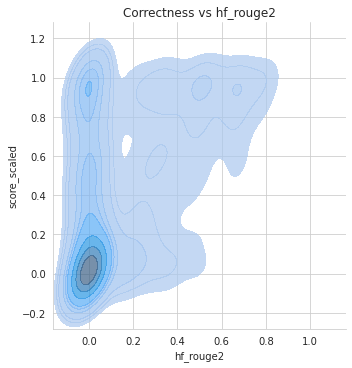

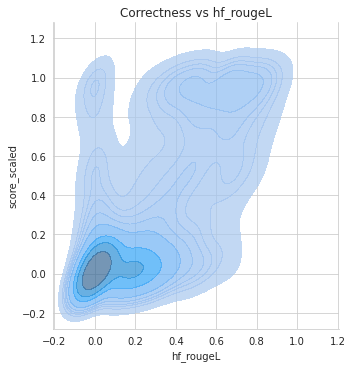

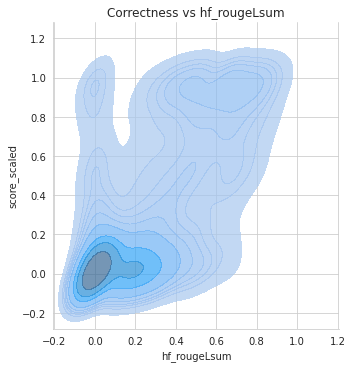

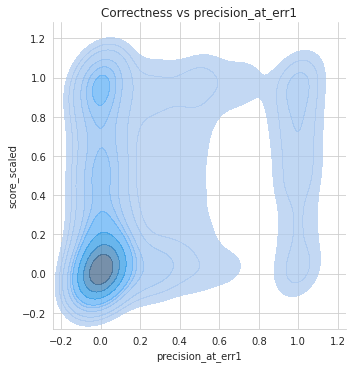

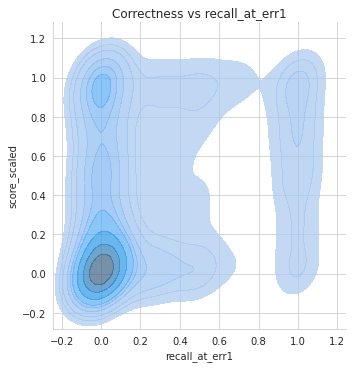

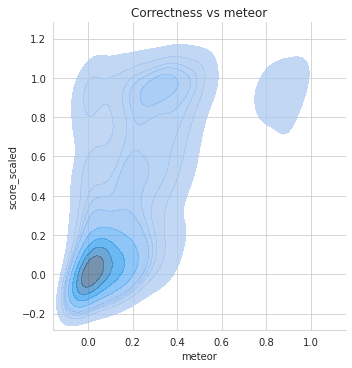

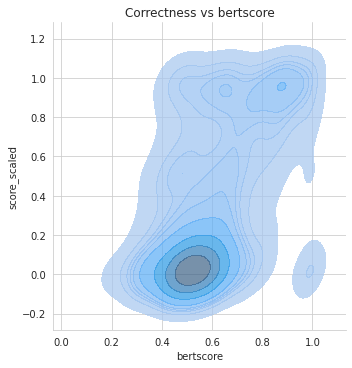

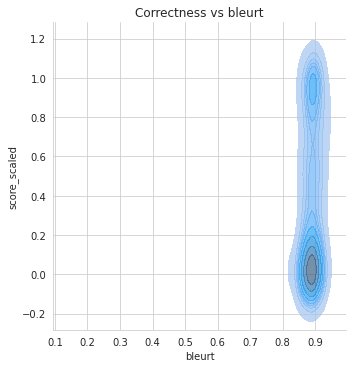

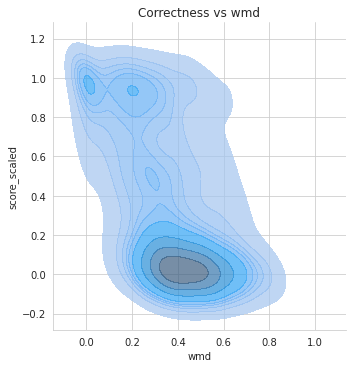

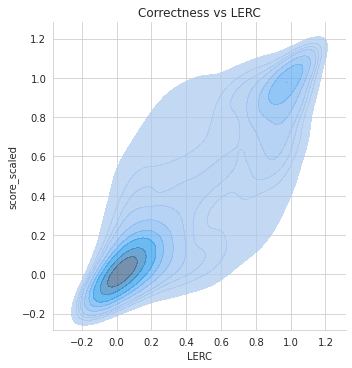

In [128]:
for feat in FEATURES +  ["LERC"]:
    sns.displot(data=df_w_lerc, x=feat, y=TARGET_COL, kind="kde", fill=True, alpha=0.7)
    plt.title(f"Correctness vs {feat}")
    plt.show()

In [ ]:
for feat in features +  ["LERC"]:
    sns.scatterplot(data=dev_df, x=feat, y="human_correctness", alpha=0.7)
    plt.title(f"Correctness vs {feat}")
    plt.show()

### Compute Pearson and Spearman Correlations

In [ ]:
def collect_correlations(df, dataset=None, metric_cols=None, target_col=TARGET_COL):
    from scipy.stats import pearsonr, spearmanr
    from sklearn.metrics import mean_absolute_error, mean_squared_error

    if dataset is not None:
        df = df[df["dataset"] == dataset].copy()
    
    if metric_cols is None:
        metric_cols = df.select_dtypes("number").columns
    
    results = {}
    for metric_col in metric_cols:
        metric_corrs = {}
        
        correctness = df[target_col]
        metric_values = df[metric_col]
        
        metric_corrs["mae"] = mean_absolute_error(y_true=correctness, y_pred=metric_values)
        metric_corrs["mse"] = mean_squared_error(y_true=correctness, y_pred=metric_values)

        pearson_val, p_value = pearsonr(correctness, metric_values)
        metric_corrs["pearson"] = pearson_val
        metric_corrs["pearson_pval"] = p_value

        spearman_val, p_value = spearmanr(correctness, metric_values)
        metric_corrs["spearman"] = spearman_val
        metric_corrs["spearman_pval"] = p_value
        
        metric_corrs["n"] = len(df)
        results[metric_col] = metric_corrs
        
    return results


def get_all_correlations(df):
    unique_datasets = sorted(df.dataset.unique())

    correlations = {"all_datasets": collect_correlations(df)}
    correlations.update({
        d: collect_correlations(df, dataset=d) for d in unique_datasets
    })
    
    return correlations


# Sanity check (:
collect_correlations(dev_df)
get_all_correlations(dev_df)

In [ ]:
dev_correlations = get_all_correlations(dev_df)

dev_corr_dfs = []
for dataset_name, correlations in dev_correlations.items():
    _df = pd.DataFrame.from_dict(correlations).T 
    dev_corr_dfs.append(_df)

dev_corr_dfs = pd.concat(dev_corr_dfs, keys=list(dev_correlations.keys()), axis=1)
dev_corr_dfs.to_csv(f"{METRICS_DIR}/dev_individual_correlations.csv")
dev_corr_dfs

In [ ]:
dev_correlations.keys()